In [ ]:
import pandas as pd
df = pd.read_csv(r'CHAOS_FEATURES.csv')
import pandas as pd
import numpy as np
from pgmpy.estimators import K2Score
from pgmpy.models import BayesianModel
from IPython.display import display
from pgmpy.inference import BeliefPropagation
from pgmpy.inference import VariableElimination
from pgmpy.estimators import BayesianEstimator
from pgmpy.estimators import MaximumLikelihoodEstimator
import networkx as nx

In [ ]:
!pip install pgmpy

     |████████████████████████████████| 348kB 2.7MB/s 


In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.columns

Index(['Area', 'Perimeter', 'Convexity', 'Circularity', 'X_start', 'Y_start',
       'Width', 'Height', 'Segmented_label'],
      dtype='object')

In [ ]:
df.head()

,Area,Perimeter,Convexity,Circularity,X_start,Y_start,Width,Height,Segmented_label
0,139.5,51.213203,False,0.668375,58,122,9,23,0
1,4597.5,323.948265,False,0.550529,53,84,87,94,0
2,1320.0,147.681239,False,0.760559,54,98,37,57,0
3,1532.5,165.580735,False,0.702410,53,94,38,65,0
4,1684.5,184.066014,False,0.624789,53,90,41,74,0


In [ ]:
from sklearn import preprocessing 
# 0 for false 1 for true  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['Convexity']= label_encoder.fit_transform(df['Convexity']) 
  
df['Convexity'].unique() 

array([0, 1])

In [ ]:
df=df.drop(columns='X_start')

In [ ]:
df=df.drop(columns='Y_start')

In [ ]:
df.head()

,Area,Perimeter,Convexity,Circularity,Width,Height,Segmented_label
0,139.5,51.213203,0,0.668375,9,23,0
1,4597.5,323.948265,0,0.550529,87,94,0
2,1320.0,147.681239,0,0.760559,37,57,0
3,1532.5,165.580735,0,0.702410,38,65,0
4,1684.5,184.066014,0,0.624789,41,74,0


In [ ]:
from pgmpy.models import BayesianModel
model = BayesianModel([('Area','Circularity'),('Perimeter','Circularity'),('Area','Convexity'),('Perimeter','Convexity'),('Circularity','Segmented_label'),('Convexity','Segmented_label'),('Width','Area'),('Height','Area')])

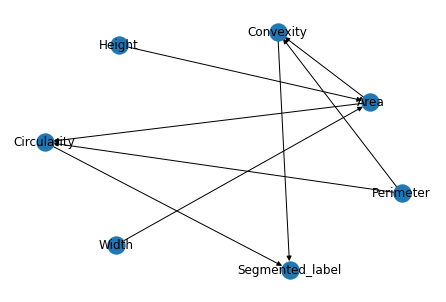

In [ ]:
nx.draw(model,with_labels=True)

**Hill Climbing Algorithm Before ranging the values (Takes a lot of time)** 

In [ ]:
import networkx as nx
import pylab as plt
def drawModel(model):
    nx.draw(model, with_labels=True)

In [ ]:
from pgmpy.estimators import HillClimbSearch

hc = HillClimbSearch(df, scoring_method=K2Score(df))
best_model = hc.estimate(max_indegree= 1)

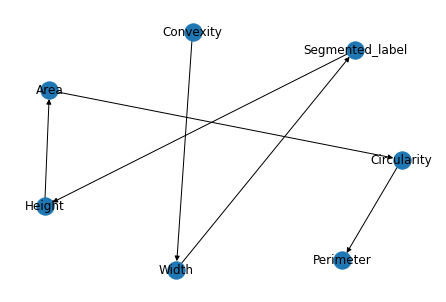

In [ ]:
drawModel(best_model)

**Area Distribution**

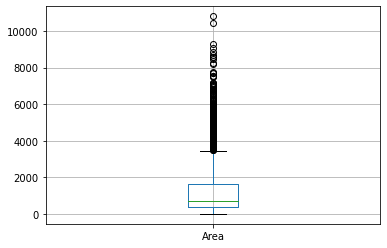

In [ ]:
df.boxplot('Area')

In [ ]:
ranges = [-1,250,500,750,1000,2000,5000,15000]
df['Area'].groupby(pd.cut(df.Area, ranges)).count()

Area
(-1, 250]        179
(250, 500]       204
(500, 750]       256
(750, 1000]      122
(1000, 2000]     188
(2000, 5000]     151
(5000, 15000]    102
Name: Area, dtype: int64

In [ ]:
labels_Area = [0,1,2,3,4,5,6]

**Perimeter Distribution**

In [ ]:
ranges_peri = [-1,75,100,125,200,700]
df['Perimeter'].groupby(pd.cut(df.Perimeter, ranges_peri)).count()

Perimeter
(-1, 75]      238
(75, 100]     268
(100, 125]    198
(125, 200]    228
(200, 700]    270
Name: Perimeter, dtype: int64

In [ ]:
labels_Peri = [0,1,2,3,4]

**Circularity Distribution**

In [ ]:
ranges_cir = [-1,0.6,0.8,1]
df['Circularity'].groupby(pd.cut(df.Circularity, ranges_cir)).count()

Circularity
(-1.0, 0.6]    351
(0.6, 0.8]     400
(0.8, 1.0]     451
Name: Circularity, dtype: int64

In [ ]:
labels_Circ = [0,1,2]

**Height Distribution**


In [ ]:
df3=df.copy()
ranges_hei = [-1,30,60,90,120]
df3['Height'].groupby(pd.cut(df3.Height, ranges_hei)).count()

Height
(-1, 30]     510
(30, 60]     381
(60, 90]     227
(90, 120]     84
Name: Height, dtype: int64

In [ ]:
labels_Height = [0,1,2,3]

**Width Distribution**

In [ ]:
df3=df.copy()
ranges_wid = [-1,43,86,129,172]
df3['Width'].groupby(pd.cut(df3.Width, ranges_wid)).count()

Width
(-1, 43]      823
(43, 86]      229
(86, 129]     126
(129, 172]     24
Name: Width, dtype: int64

In [ ]:
labels_Width = [0,1,2,3]

In [ ]:
df1 = df.copy()

In [ ]:
df1['Area'] = pd.cut(df1['Area'], bins=ranges, labels=labels_Area, include_lowest=True)

In [ ]:
df1['Perimeter'] = pd.cut(df1['Perimeter'], bins=ranges_peri, labels=labels_Peri, include_lowest=True)

In [ ]:
df1['Circularity'] = pd.cut(df1['Circularity'], bins=ranges_cir, labels=labels_Circ, include_lowest=True)

In [ ]:
df1['Height'] = pd.cut(df1['Height'], bins=ranges_hei, labels=labels_Height, include_lowest=True)

In [ ]:
df1['Width'] = pd.cut(df1['Width'], bins=ranges_wid, labels=labels_Width, include_lowest=True)

In [ ]:
df1.head()

,Area,Perimeter,Convexity,Circularity,Width,Height,Segmented_label
0,0,0,0,1,0,0,0
1,5,4,0,0,2,3,0
2,4,3,0,1,0,1,0
3,4,3,0,1,0,2,0
4,4,3,0,1,0,2,0


Text(0.5, 1.0, 'Area range Distribution')

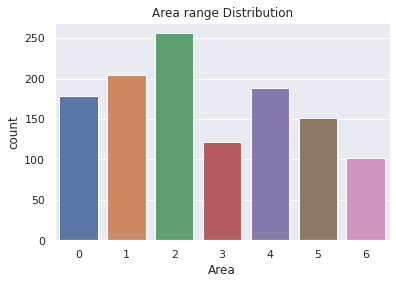

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="Area", data=df1)
ax.set_title('Area range Distribution')

Text(0.5, 1.0, 'Perimeter range Distribution')

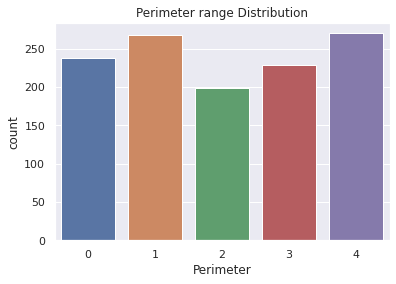

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Perimeter", data=df1)
ax.set_title('Perimeter range Distribution')

Text(0.5, 1.0, 'Circularity range Distribution')

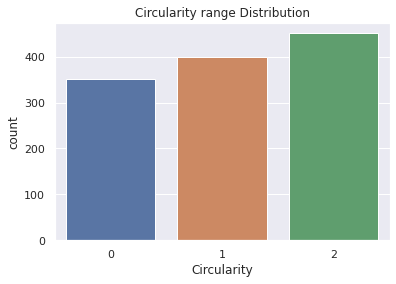

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Circularity", data=df1)
ax.set_title('Circularity range Distribution')

Text(0.5, 1.0, 'Height range Distribution')

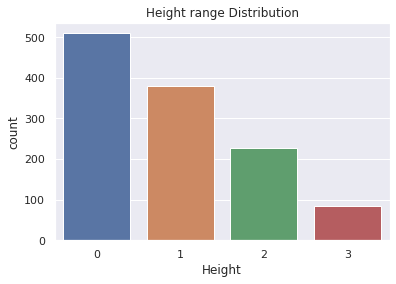

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Height", data=df1)
ax.set_title('Height range Distribution')

Text(0.5, 1.0, 'Width range Distribution')

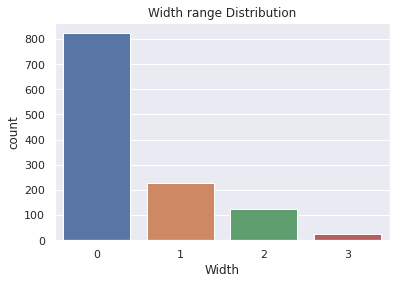

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Width", data=df1)
ax.set_title('Width range Distribution')

In [ ]:
df1.Area.unique()

[0, 5, 4, 6, 2, 1, 3]
Categories (7, int64): [0 < 1 < 2 < 3 < 4 < 5 < 6]

In [ ]:
df1.Perimeter.unique()

[0, 4, 3, 2, 1]
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [ ]:
df1.Circularity.unique()

[1, 0, 2]
Categories (3, int64): [0 < 1 < 2]

In [ ]:
df1.Convexity.unique()

array([0, 1])

In [ ]:
df1.head()

,Area,Perimeter,Convexity,Circularity,Width,Height,Segmented_label
0,0,0,0,1,0,0,0
1,5,4,0,0,2,3,0
2,4,3,0,1,0,1,0
3,4,3,0,1,0,2,0
4,4,3,0,1,0,2,0


**Hill Climbing Algorithm after ranging values**

In [ ]:
hc2 = HillClimbSearch(df1, scoring_method=K2Score(df))
best_model2 = hc2.estimate(max_indegree= 1)

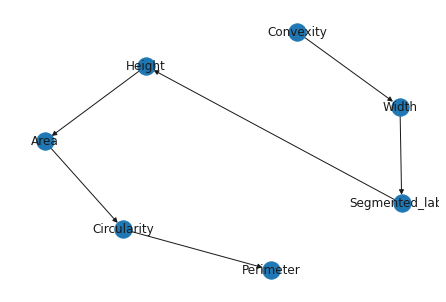

In [ ]:
drawModel(best_model2)

The following generated model changed as the varaibles have been reduced to a range of values.

In [ ]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
model.fit(df1, estimator=MaximumLikelihoodEstimator)

In [ ]:
print(model.get_cpds('Area'))

+---------+----------------------+-----------+---------------------+---------------------+---------------------+---------------------+-----------+---------------------+--------------------+----------------------+-----------+-----------+---------------------+---------------------+---------------------+-----------+
| Height  | Height(0)            | Height(0) | Height(0)           | Height(0)           | Height(1)           | Height(1)           | Height(1) | Height(1)           | Height(2)          | Height(2)            | Height(2) | Height(2) | Height(3)           | Height(3)           | Height(3)           | Height(3) |
+---------+----------------------+-----------+---------------------+---------------------+---------------------+---------------------+-----------+---------------------+--------------------+----------------------+-----------+-----------+---------------------+---------------------+---------------------+-----------+
| Width   | Width(0)             | Width(1)  | Width(2)

In [ ]:
print(model.get_cpds('Perimeter'))

+--------------+----------+
| Perimeter(0) | 0.198003 |
+--------------+----------+
| Perimeter(1) | 0.222962 |
+--------------+----------+
| Perimeter(2) | 0.164725 |
+--------------+----------+
| Perimeter(3) | 0.189684 |
+--------------+----------+
| Perimeter(4) | 0.224626 |
+--------------+----------+


In [ ]:
print(model.get_cpds('Convexity'))

+--------------+---------------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+
| Area         | Area(0)             | Area(0)      | Area(0)      | Area(0)      | Area(0)      | Area(1)      | Area(1)      | Area(1)      | Area(1)      | Area(1)      | Area(2)      | Area(2)      | Area(2)      | Area(2)      | Area(2)      | Area(3)      | Area(3)      | Area(3)      | Area(3)      | Area(3)      | Area(4)      | Area(4)      | Area(4)      | Area(4)      | Area(4)      | Area(5)      | Area(5)      | Area(5)      | Area(5)

In [ ]:
print(model.get_cpds('Segmented_label'))

+--------------------+----------------------+----------------+---------------------+--------------------+---------------------+---------------------+
| Circularity        | Circularity(0)       | Circularity(0) | Circularity(1)      | Circularity(1)     | Circularity(2)      | Circularity(2)      |
+--------------------+----------------------+----------------+---------------------+--------------------+---------------------+---------------------+
| Convexity          | Convexity(0)         | Convexity(1)   | Convexity(0)        | Convexity(1)       | Convexity(0)        | Convexity(1)        |
+--------------------+----------------------+----------------+---------------------+--------------------+---------------------+---------------------+
| Segmented_label(0) | 0.5698005698005698   | 0.25           | 0.45843828715365237 | 0.0                | 0.13470319634703196 | 0.07692307692307693 |
+--------------------+----------------------+----------------+---------------------+----------------

In [ ]:
print(model.get_cpds('Circularity'))

+----------------+---------------------+--------------+--------------------+--------------------+--------------------+---------------------+--------------+--------------+--------------------+--------------------+--------------------+---------------------+---------------------+--------------+--------------------+--------------------+--------------------+---------------------+--------------+--------------------+--------------------+--------------------+--------------+---------------------+--------------+--------------------+--------------------+--------------------+--------------+---------------------+--------------------+--------------------+--------------------+--------------------+---------------------+
| Area           | Area(0)             | Area(0)      | Area(0)            | Area(0)            | Area(0)            | Area(1)             | Area(1)      | Area(1)      | Area(1)            | Area(1)            | Area(2)            | Area(2)             | Area(2)             | Area(2) 

In [ ]:
model.get_independencies()

(Area _|_ Perimeter)
(Area _|_ Perimeter | Width)
(Area _|_ Perimeter | Height)
(Area _|_ Perimeter | Height, Width)
(Area _|_ Segmented_label | Circularity, Convexity)
(Area _|_ Segmented_label | Circularity, Convexity, Width)
(Area _|_ Segmented_label | Circularity, Perimeter, Convexity)
(Area _|_ Segmented_label | Circularity, Convexity, Height)
(Area _|_ Segmented_label | Circularity, Perimeter, Convexity, Width)
(Area _|_ Segmented_label | Circularity, Convexity, Height, Width)
(Area _|_ Segmented_label | Circularity, Perimeter, Convexity, Height)
(Area _|_ Segmented_label | Width, Perimeter, Height, Circularity, Convexity)
(Circularity _|_ Height, Width | Area)
(Circularity _|_ Height | Area, Width)
(Circularity _|_ Width, Height | Segmented_label, Area)
(Circularity _|_ Width, Convexity, Height | Perimeter, Area)
(Circularity _|_ Width | Area, Height)
(Circularity _|_ Width, Height | Convexity, Area)
(Circularity _|_ Height | Segmented_label, Area, Width)
(Circularity _|_ Convex

In [ ]:
# print(model.get_cpds('Segmented_label'))

In [ ]:
# df.head

In [ ]:
# df.to_csv('New_chaos.csv')

In [ ]:
model.edges()

OutEdgeView([('Area', 'Circularity'), ('Area', 'Convexity'), ('Circularity', 'Segmented_label'), ('Perimeter', 'Circularity'), ('Perimeter', 'Convexity'), ('Convexity', 'Segmented_label')])

**Variable Elimination**

In [ ]:
from pgmpy.inference import VariableElimination
varel= VariableElimination(model)
df2=df1.copy()
df2.head()

,Area,Perimeter,Convexity,Circularity,Width,Height,Segmented_label
0,0,0,0,1,0,0,0
1,5,4,0,0,2,3,0
2,4,3,0,1,0,1,0
3,4,3,0,1,0,2,0
4,4,3,0,1,0,2,0


In [ ]:
df1.drop(['Segmented_label'],inplace = True,axis =1)

In [ ]:
df1.head()

,Area,Perimeter,Convexity,Circularity,Width,Height
0,0,0,0,1,0,0
1,5,4,0,0,2,3
2,4,3,0,1,0,1
3,4,3,0,1,0,2
4,4,3,0,1,0,2


In [ ]:
prediction=model.predict(df1)

100%|██████████| 84/84 [00:04<00:00, 17.76it/s]


Count of prediction values

In [ ]:
import collections
counter=collections.Counter(prediction['Segmented_label'])
print(counter)

Counter({0: 748, 2: 438, 1: 16})


Count of actual values

In [ ]:
counter=collections.Counter(df2['Segmented_label'])
print(counter)

Counter({0: 442, 2: 268, 1: 259, 3: 233})


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(df2['Segmented_label'],prediction['Segmented_label'])

0.4933444259567388

In [ ]:
evid = df1.to_dict(orient = 'records')
query = []
for i in range(len(evid)):
    query.append(varel.map_query(variables = ['Segmented_label'], evidence = evid[i])['Segmented_label'])

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it

In [ ]:
acc = (float)((query == df2['Segmented_label']).sum()/len(query))*100
print ("Accuracy = " + str(acc))

Accuracy = 49.33444259567388
